In [70]:
# POPULATION ANALYSIS: pupil & behaviour effect

# import list
%reload_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import main_funcs as mfun
import utils_funcs as utils
import plot_funcs as pfun
import matplotlib.pyplot as plt
import pickle
from scipy import stats
from itertools import compress
import seaborn as sns

#parameters
fRate = 1000/30.0
pre_frames    = 2000.0# in ms
pre_frames    = int(np.ceil(pre_frames/fRate))
post_frames   = 6000.0 # in ms
post_frames   = int(np.ceil(post_frames/fRate))
analysis_time = 1000.0 # in ms
analysis_time = int(np.ceil(analysis_time/fRate))
simulationDur_ms = 350.0 # in ms
simulationDur = int(np.ceil(simulationDur_ms/fRate))

#paths

savefigpath  = r'G:\My Drive\Manuscripts\0 CLAStPFC\panels_raw'
analysispath = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\'

# load data

infoPath = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\infoForAnalysis-readyForPlotting.pkl'
dff_traceBoth, dff_traceVis, dff_traceOpto = pd.read_pickle(infoPath) 


#infoPath = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\infoForAnalysis-readyForPlotting.pkl'
#dff_meanBoth1sec, dff_meanVis1sec, dff_meanOpto1sec   = pd.read_pickle(infoPath) 


infoPath = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\infoForAnalysis-readyForPlottingPupil.pkl'
pupil_traceVis, pupil_traceBoth, pupil_traceOpto   = pd.read_pickle(infoPath) 

infoPath = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\infoForAnalysis-extracted.pkl'
info = pd.read_pickle(infoPath) 



37322
4
3


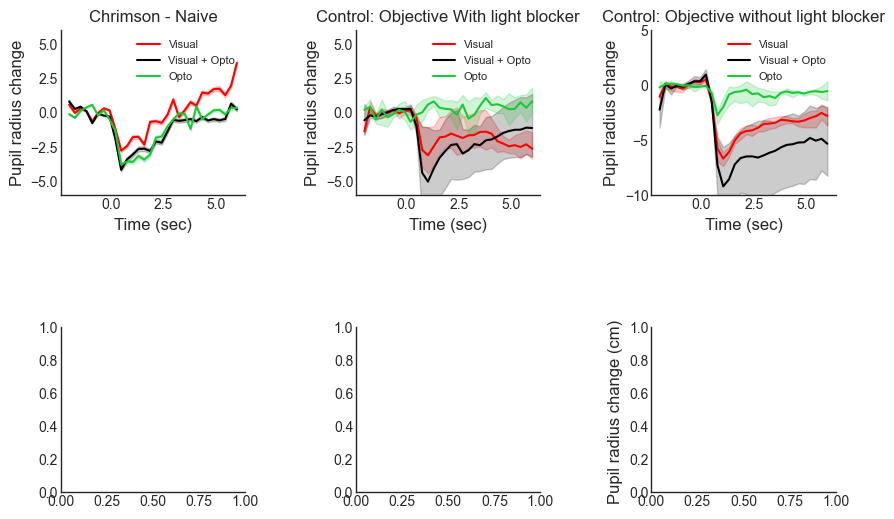

In [75]:
# Average pupil responses for visual, opto and visual + opto trials
# load data

tTypes = [ 'Visual + Opto','Visual','Opto']

fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(10,6))
plt.subplots_adjust( hspace = 0.8, wspace = 0.6)
pfun.set_figure()

responsiveSensory = mfun.selectInterestedcells ( 'Chrimson', 'Naive', responsive = False, plotValues = False, pupil = True )
responsive = responsiveSensory #| responsiveNoSensory
print(sum(responsive))
pfun.lineplot_withSEM_pupil (pupil_traceVis[responsive].transpose(), 0, tTypes[1], axs[0,0])
pfun.lineplot_withSEM_pupil (pupil_traceBoth[responsive].transpose(), 1, tTypes[0], axs[0,0])
pfun.lineplot_withSEM_pupil (pupil_traceOpto[responsive].transpose(), 2, tTypes[2], axs[0,0])
axs[0,0].set_title( 'Chrimson - Naive')
axs[0,0].set_ylim(-6, 6)
axs[0,0].set_ylabel('Pupil radius change')
axs[0,0].legend(loc='upper right', fontsize=8, frameon=False)

responsiveSensory = mfun.selectInterestedcells ( 'Control', 'Pupil-control-coveredMicroscope', responsive = False, plotValues = False, pupil = True )
responsive = responsiveSensory
print(sum(responsive))
pfun.lineplot_withSEM_pupil (pupil_traceVis[responsive].transpose(), 0, tTypes[1], axs[0,1])
pfun.lineplot_withSEM_pupil (pupil_traceBoth[responsive].transpose(), 1, tTypes[0], axs[0,1])
pfun.lineplot_withSEM_pupil (pupil_traceOpto[responsive].transpose(), 2, tTypes[2], axs[0,1])
axs[0,1].set_title( 'Control: Objective With light blocker')
axs[0,1].set_ylabel('Pupil radius change')
axs[0,1].set_ylim(-6, 6)
axs[0,1].legend(loc='upper right', fontsize=8, frameon=False)   

responsiveSensory = mfun.selectInterestedcells ( 'Control', 'Pupil-control-not-coveredMicroscope', responsive = False, plotValues = False, pupil = True )
responsive = responsiveSensory# | responsiveNoSensory
print(sum(responsive))
pfun.lineplot_withSEM_pupil (pupil_traceVis[responsive].transpose(), 0, tTypes[1], axs[0,2])
pfun.lineplot_withSEM_pupil (pupil_traceBoth[responsive].transpose(), 1, tTypes[0], axs[0,2])
pfun.lineplot_withSEM_pupil (pupil_traceOpto[responsive].transpose(), 2, tTypes[2], axs[0,2])
axs[0,2].set_title( 'Control: Objective without light blocker')
axs[0,2].set_ylabel('Pupil radius change')
axs[0,2].set_ylim(-10, 5)
axs[0,2].legend(loc='upper right', fontsize=8, frameon=False)



pfun.save_figure( 'FigureSupp_AveragePupil',savefigpath)


In [4]:
import os
import pickle

# Define the parent directory
base_dir = r"C:\Users\Huriye\Documents\code\clapfcstimulation\analysis"  

# Loop through folders starting with "2025"
for folder_name in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder_name)
    if os.path.isdir(folder_path) and folder_name.startswith("2025"):
        pkl_path = os.path.join(folder_path, "extracted_variables.pkl")
        
        if os.path.exists(pkl_path):
                print(f"Processing: {pkl_path}")
                with open(pkl_path, "rb") as f:
                    data = pickle.load(f)

                # Make shuttle from data['Visual']
                # Replace this logic with your actual "shuttle" operation
                data['Opto'] = data['Visual']  # Placeholder: duplicate or transform as needed
                ssdssds
                # Save the modified data back to the same file
                with open(pkl_path, "wb") as f:
                    pickle.dump(data, f)

                print(f"Updated: {pkl_path}")


Processing: C:\Users\Huriye\Documents\code\clapfcstimulation\analysis\2025-06-06_25101_001\extracted_variables.pkl


TypeError: list indices must be integers or slices, not str

In [5]:
data

[array([ 5488,  5922,  6292,  6596,  6896,  7305,  7725,  8080,  8423,
         8805,  9225,  9512,  9955, 10393, 10824, 11252, 11597, 11952,
        12399, 12689, 13016, 13341, 13786, 14089, 14379, 14660, 14963,
        15279, 15644, 16069]),
 ['onlyVis',
  'onlyVis',
  'Both',
  'onlyVis',
  'onlyVis',
  'Both',
  'Both',
  'Both',
  'onlyVis',
  'Both',
  'Both',
  'Both',
  'Both',
  'Both',
  'onlyVis',
  'onlyVis',
  'Both',
  'Both',
  'Both',
  'onlyVis',
  'Both',
  'Both',
  'Both',
  'Both',
  'onlyVis',
  'Both',
  'Both',
  'Both',
  'Both',
  'onlyVis'],
 {'All': array([6.86070598e-001, 6.80870134e-006, 3.99085781e-001, 1.09673187e-002,
         3.01316649e-003, 4.83617509e-002, 3.54210859e-001, 4.04581352e-002,
         5.28756255e-003, 1.87733494e-001, 3.66801734e-001, 1.00107095e-001,
         7.00240581e-002, 1.33705132e-002, 7.17626210e-001, 7.90238464e-001,
         1.25639791e-001, 5.99617994e-005, 1.48315545e-001, 1.98284369e-003,
         1.79723426e-004, 2.55158